# CS 613 - Machine Learning

# Assignment 3 - Dimensionality Reduction & Clustering

Name <br>
CS 613 Machine Learning <br>
Fall 2021 <br>
Dr. Edward Kim <br>
Drexel University <br>

# Introduction


In this assignment you'll work on visualizing data, reducing its dimensionality and clustering it.

You may not use any functions from machine learning library in your code, however you may use statistical functions.  For example, if available you __MAY NOT__ use functions like:

- pca
- k-nearest neighbors functions

Unless explicitly told to do so.  

But you __MAY__ use basic statistical functions like:
- std
- mean
- cov
- eig
- svd

# Submission 
For your submission, upload to Blackboard a single zip file containing:

1. A LaTeX typeset PDF or Jupyter Notebook PDF containing: <br>

 _(a)_ Part 1:  Your answers to the theory questions. <br>
 
 1.1a. The principle components are:
 
 1.1b. The data projected onto the to 1st principle component: 
 
 1.2a. 
  - x1 information gain:
  - x2 information gain:

 1.2b. 

 1.2c. The directions corresponding to eignevectors are:
 
 1.2d The data projected is:
        
 1.2e  
 
 <img src="image_file_name.png" width=420 height=420 />

 _(b)_ Part 2:  The visualization of the PCA result, KNN accuracies. <br>
 
 KNN score, k=1, no PCA: <br>
 KNN score, k=1, PCA100: <br>
 KNN score whitened: <br>
 Project PCA2 (image):
 
  <img src="image_file_name.png" width=420 height=420 />

 _(c)_ Part 3:
 
 _(d)_ Part 4:

 _(e)_ Source Code - python notebook

In [2595]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy.matlib
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

# DataSets

Labeled Faces in the Wild Dataset. This  dataset  consists  of  celebrities  download from the Internet from the early 2000s.  We use the grayscale version from sklearn.datasets. We will download the images in a specific way as shown below.  You will have 3,023 images, each 87x65 pixels large, belonging to 62 different people.

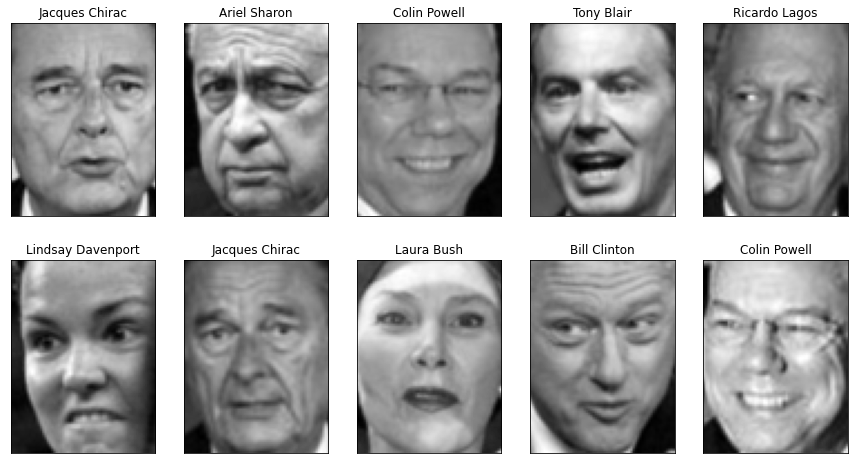

In [1054]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib.cm as cm

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=cm.gray)
    ax.set_title(people.target_names[target])

# Part 1: Theory Questions

## 1.1 Consider the following data:

In [2227]:
x1 = [-2., -5., -3., 0., -8., -2., 1., 5., -1., 6.]
x2 = [1., -4., 1., 3., 11., 5., 0, -1., -3., 1.]
theory_data1 = pd.DataFrame({
    'x1': x1,
    'x2': x2
})
theory_data1

,x1,x2
0,-2.0,1.0
1,-5.0,-4.0
2,-3.0,1.0
3,0.0,3.0
4,-8.0,11.0
5,-2.0,5.0
6,1.0,0.0
7,5.0,-1.0
8,-1.0,-3.0
9,6.0,1.0


a. Find the principle components of the data (you must show the math, including how you compute the eivenvectors and eigenvalues).  Make sure you standardize the data first and that your principle components are normalized to be unit length.  As for the amount of detail needed in your work imagine that you were working on paper with a basic calculator.  Show me whatever you would be writing on that paper.  (5pts)

In [2228]:
import math
m1=np.sum(x1)/10
var= np.sum((x1 - m1) ** 2) / 9
std = var ** 0.5
m2=np.sum(x2)/10
var1= np.sum((x2 - m2) ** 2) / 9
std1= var1 ** 0.5
def Standardise(x):
    return (x-m1)/std
def Standardise1(x):
    return (x-m2)/std1
x1=Standardise(x1)
x2=Standardise1(x2)
x11=np.array([x1,x2])
x11=x11.T
print(x11)

[[-0.26015724 -0.09359019]
 [-0.96967699 -1.2634676 ]
 [-0.49666382 -0.09359019]
 [ 0.21285592  0.37436077]
 [-1.67919674  2.24616461]
 [-0.26015724  0.84231173]
 [ 0.44936251 -0.32756567]
 [ 1.39538884 -0.56154115]
 [-0.02365066 -1.02949211]
 [ 1.63189542 -0.09359019]]


In [1605]:
#Covariance
A=(x11.T@x11)/(x11.shape[0]-1)
df.cov()
A

array([[ 1.        , -0.40826218],
       [-0.40826218,  1.        ]])

In [1531]:
0.1666780076183524-1

-0.8333219923816476

The equation to find X in a quadratic equation is 
        x=−𝑏 ± sqrt(𝑏^2−4𝑎𝑐) / 2𝑎
        
In the above equation b=-2 a=1 c=0.8333219923816476
x1=(-(-2)+math.sqrt(((-2)**2)-(4*1*0.8333219923816476)))/2
𝜆1=1.40826218 𝜆2=0.5917378200000001 are the Eigen values

In [1535]:
(2+math.sqrt(((-2)**2)-(4*1*0.8333219923816476)))/2
(2-math.sqrt(((-2)**2)-(4*1*0.8333219923816476)))/2
1.-1.40826218
-0.4082621799999999*1/0.40826218
-0.40826218*1/0.408262179999999
e1=np.array([[1],[0.9999999999999999]])
print(e1.T@e1)
e11=np.array([[1],[1.0000000000000024]])
print(e11.T@e11)
vector=(1/math.sqrt(2))*e11
vector

[[2.]]
[[2.]]


array([[0.70710678],
       [0.70710678]])

In [1507]:
0.4082621799999999*1/0.40826218
-0.40826218*1/-0.4082621799999999
e1=np.array([[1],[0.9999999999999999]])
print(e1.T@e1)
e11=np.array([[1],[1.0000000000000024]])
print(e11.T@e11)
1-0.5917378200000001

0.9999999999999999

b. Project the data onto the principal component corresponding to the largest eigenvalue found in the previous part (3pts)

In [2235]:
x11@np.array([[0.70710678], [-0.70710678]])

array([[-0.11778069],
       [ 0.20774133],
       [-0.2850161 ],
       [-0.11420117],
       [-2.77564962],
       [-0.77956328],
       [ 0.54937118],
       [ 1.38375846],
       [ 0.71123731],
       [ 1.22010257]])

## 1.2. Consider the following data

In [2327]:
x1 = [-2., -5., -3., 0., -8., -2., 1., 5., -1., 6.]
x2 = [1., -4., 1., 3., 11., 5., 0, -1., -3., 1.]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
td2 = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y': y,
    'Count': 1
})

In [2328]:
td2.groupby(['y', 'x1', 'x2']).first()

Count
y x1   x2          
0 -8.0  11.0      1
  -5.0 -4.0       1
  -3.0  1.0       1
  -2.0  1.0       1
   0.0  3.0       1
1 -2.0  5.0       1
  -1.0 -3.0       1
   1.0  0.0       1
   5.0 -1.0       1
   6.0  1.0       1

In [2329]:
m1=np.sum(x1)/10
m2=np.sum(x2)/10
def threshold(x):
    for i in range(0,len(x)):
        if x[i]<m1:
            x[i]=0
        else:
            x[i]=1
        i+=1
    return x
def threshold1(x):
    for i in range(0,len(x)):
        if x[i]<m2:
            x[i]=0
        else:
            x[i]=1
        i+=1
    return x
x11=threshold(x1)
x21=threshold1(x2)
m2

1.4

In [2330]:
td3 = pd.DataFrame({
    'x11': x11,
    'x21': x21,
    'y1': y,
    'Count1': 1
})
td3

,x11,x21,y1,Count1
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,1,1,0,1
4,0,1,0,1
5,0,1,1,1
6,1,0,1,1
7,1,0,1,1
8,0,0,1,1
9,1,0,1,1


(a)  Compute the information gain for each feature. You could standardize the data overall, although it won’t make a difference.  (5pts).

In [2331]:
hy = -5/10*np.log2(5/10)-5/10*np.log2(5/10)
hx1 = (6/10)*(-(4/6)*np.log2(4/6)-(2/6)*np.log2(2/6))+(4/10)*(-(1/4)*np.log2(1/4)-(3/4)*np.log2(3/4))
hx2 = (7/10)*(-(3/7)*np.log2(3/7)-(4/7)*np.log2(4/7))+(3/10)*(-(2/3)*np.log2(2/3)-(1/3)*np.log2(1/3))
infox1=hy-hx1
infox2=hy-hx2
print(infox1,infox2)

0.12451124978365313 0.034851554559677034


In [2332]:
(6/10)*(-(4/6)*np.log2(4/6)-(2/6)*np.log2(2/6))+(4/10)*(-(1/4)*np.log2(1/4)-(3/4)*np.log2(3/4))

0.8754887502163469

In [2333]:
print("information gain of x1=",infox1,"information gain of x2=",infox2)

information gain of x1= 0.12451124978365313 information gain of x2= 0.034851554559677034


(b)  Which feature is more discriminating based on results in part a (1pt)?

Feature x1 is more discriminating as it has higher information gain

(c)  Using LDA, find the direction of projection (you must show the math, however for this one you don’t have to show the computation for finding the eigenvalues and eigenvectors). Normalize this vector to be unit length (5pts).

In [2438]:
x1 = [-2., -5., -3., 0., -8., -2., 1., 5., -1., 6.]
x2 = [1., -4., 1., 3., 11., 5., 0, -1., -3., 1.]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
td2 = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y': y,
    'Count': 1
})

In [2439]:
import math
m12=np.sum(x1)/10
var12= np.sum((x1 - m1) ** 2) / 9
std12 = var ** 0.5
m22=np.sum(x2)/10
var13= np.sum((x2 - m2) ** 2) / 9
std13= var1 ** 0.5
def Standardise(x):
    return (x-m12)/std12
def Standardise1(x):
    return (x-m22)/std13
x1=Standardise(x1)
x2=Standardise1(x2)
x11=np.array([x1,x2])
x11=x11.T
print(m12,m22,std13,std12)

-0.9 1.4 4.273952113286562 4.2282121254470875


In [2440]:
x11

array([[-0.26015724, -0.09359019],
       [-0.96967699, -1.2634676 ],
       [-0.49666382, -0.09359019],
       [ 0.21285592,  0.37436077],
       [-1.67919674,  2.24616461],
       [-0.26015724,  0.84231173],
       [ 0.44936251, -0.32756567],
       [ 1.39538884, -0.56154115],
       [-0.02365066, -1.02949211],
       [ 1.63189542, -0.09359019]])

In [2441]:
m_class1=np.mean(x11[:5,:],axis=0)
m_class2=np.mean(x11[5:,:],axis=0)
print(m_class1,m_class2)
c1=x11[:5,:]-m_class1
c2=x11[5:,:]-m_class2
print(c1)
print(c2)

[-0.63856777  0.23397548] [ 0.63856777 -0.23397548]
[[ 0.37841053 -0.32756567]
 [-0.33110922 -1.49744308]
 [ 0.14190395 -0.32756567]
 [ 0.8514237   0.14038529]
 [-1.04062896  2.01218913]]
[[-0.89872501  1.07628721]
 [-0.18920527 -0.09359019]
 [ 0.75682106 -0.32756567]
 [-0.66221843 -0.79551663]
 [ 0.99332765  0.14038529]]


In [2442]:
covc1=4*(c1.T@c1/4)
covc1

array([[ 2.08079553, -1.64903489],
       [-1.64903489,  6.52554745]])

In [2443]:
covc2=4*(c2.T@c2/4)
covc2

array([[ 2.84151647, -0.53123272],
       [-0.53123272,  1.9270073 ]])

In [2444]:
sw=covc1+covc2
sw

array([[ 4.922312  , -2.18026761],
       [-2.18026761,  8.45255474]])

In [2445]:
mean1=m_class1.reshape(2,1)
mean2=m_class2.reshape(1,2)
sb=mean1@mean2
sb

array([[-0.4077688 ,  0.1494092 ],
       [ 0.1494092 , -0.05474453]])

In [2446]:
swinv=np.linalg.inv(sw)
swinv

array([[0.22936149, 0.05916193],
       [0.05916193, 0.13356776]])

In [2447]:
A=swinv@sb
E,V=np.linalg.eig(A)
print(E)
print(V)

[-8.31598924e-02  4.33680869e-19]
[[-0.99879099 -0.34403943]
 [-0.04915855 -0.9389552 ]]


(d)  Project the data onto the principal component found in the previous part (3pts).

In [2448]:
print(V[:,1])
print(m_class1@V[:,1])
print(m_class2@V[:,1])


[-0.34403943 -0.9389552 ]
8.326672684688674e-17
-8.326672684688674e-17


In [2449]:
print(x11@V[:,1])

[ 0.17738135  1.51994659  0.25874894 -0.42473882 -1.53133805 -0.70138863
  0.15297107  0.0471932   0.97478373 -0.47355938]


(e)  Does the projection you performed in the previous part seem to provide good class separation?  Why or why not (1pt)?

---
---
# Part 2: Dimensionality Reduction via PCA

Import the data as shown above.  This the labeled faces in the wild dataset.
Verify that you have the correct number of people and classes 






In [2455]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (2537, 87, 65)
Number of classes: 45


This dataset is skewed toward George W. Bush and Colin Powell as you can verify here:


In [2456]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Ariel Sharon               77   Atal Bihari Vajpayee       24   
Bill Clinton               29   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Hamid Karzai               22   Hans Blix                  39   Hugo Chavez                71   
Igor Ivanov                20   Jack Straw                 28   Jacques Chirac             52   
Jean Chretien              55   Jennifer Aniston           21   Jennifer Capriati          42   
Jennifer Lopez             21   John Ashcroft              53   Juan Carlos Ferrero        28   
Junichiro Koizumi          60   Kofi Annan                 32   Laura Bush                 41   
Lindsay Davenport          22 

To make the data less skewed, we will only take up to 50 images of each person (otherwise, the feature extraction would be overwhelmed by the likelihood of George W. Bush): 

In [2457]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

<ipython-input-2457-0f53c27b3db9>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [2458]:
y_people.shape

(1577,)

We are now going to compute how well a KNN classifier does using just the pixels alone.


In [2459]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.10f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.2784810127


You should have an accuracy around 23\% - 27\%.

**Once you have your setup complete, write a script to do the following:**


1.  Write your own version of KNN (k=1) where you use the SSD (sum of squared differences) to compute similarity

2.  Verify that your KNN has a similar accuracy as sklearn’s version

3.  Standardize your data (zero mean, divide by standard deviation)

4.  Reduces the data to 100D using PCA

5.  Compute the KNN again where K=1 with the 100D data.  Report the accuracy

6.  Compute the KNN again where K=1 with the 100D Whitened data.  Report the accuracy

7.  Reduces the data to 2D using PCA

8.  Graphs the data for visualization

Recall that although you may not use any package ML functions like _pca_, you may use statistical functions like _eig_ or _svd_.

Your graph should end up looking similar to Figure 1 _refer to the PDF for the figure_ (although it may be rotated differently, de-pending how you ordered things)

In [2460]:
df = pd.DataFrame(data=X_people)
def Standardise(string1):
    m1=np.mean(string1)
    std1=np.std(string1)
    string2=(string1-m1)/std1
    return string2
df1=df.apply(Standardise)
f=df1.to_numpy()

In [2461]:
e1=df1.T.to_numpy()
e1.shape

(5655, 1577)

In [2462]:
v=np.cov(e1)

In [2463]:
v.shape

(5655, 5655)

In [2464]:
from numpy.linalg import eig
val,vec=eig(v)

In [2301]:
vec.shape

(5655, 5655)

In [2465]:
sorted_index = np.argsort(val)[::-1]
sorted_eigenvalue = val[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = vec[:,sorted_index]

In [2466]:
n_components = 100 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
eigenvector_subset.shape

(5655, 100)

In [2467]:
X_reduced = np.dot(eigenvector_subset.transpose(),f.transpose()).transpose()

In [2468]:
dff_y=pd.DataFrame(data=y_people)

In [2469]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_people, stratify=y_people, random_state=0)

In [2470]:
from scipy.stats import mode
def sumofsquare_distance(row1, row2):
    dist = np.sum((row1-row2)**2)
    return dist
'''def mode(label,val):
    for i in range(0,len(label)):
        dict=dict(label[i],)
    if label in val:
        dict'''  
def predict_classification(train, test,input1, num):
    output=[]
    value=[]
    for i in input1:
        distances =list()
        for j in range(len(train)): 
            distance = sumofsquare_distance(np.array(train[j,:]) , i) 
            distances.append(distance)
        dist = np.argsort(distances)[:num] 
        labels = test[dist]
        value.append(labels)
        
        lab = mode(labels) 
        lab = lab.mode[0]
        output.append(lab)

    return output   

In [2471]:
def accuracy_metric(act, pred):
    correct = 0
    for i in range(0,act.shape[0]):
        if act[i] == pred[i]:
            correct += 1
        i=i+1
    return correct / float(len(act)) * 100.0
 

In [2472]:
Yn=predict_classification(X_train,y_train,X_test,1)

In [2473]:
accuracy_metric(y_test,Yn)

31.39240506329114

In [ ]:
#pcawhitening

In [2474]:
sorted_index2 = np.argsort(val)[::-1]
d=100
vec_new=vec[:,sorted_index2]
val_new=val[sorted_index2]
vec_new=vec[:,0:d]
val_new=val[0:d]
temp=1/np.sqrt(val_new)
lambda1=np.diag(temp)
eigenvector=vec_new@lambda1
pca_wht=f@eigenvector
print(lambda1.shape,vec_new.T.shape)
print(pca_wht.shape)

(100, 100) (100, 5655)
(1577, 100)


In [2476]:
X_train, X_test, y_train, y_test = train_test_split(pca_wht, y_people, stratify=y_people, random_state=0)

In [2477]:
Yn1=predict_classification(X_train,y_train,X_test,1)
accuracy_metric(y_test,Yn1)

37.9746835443038

In [2479]:
n_components1 = 2 #you can select any number of components.
eigenvector_subset1 = sorted_eigenvectors[:,0:n_components]
X_reduced1 = np.dot(eigenvector_subset1.transpose(),f.transpose()).transpose()

/Users/brindakulkarni/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


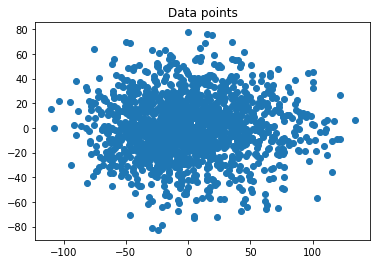

In [2480]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_reduced1[:,0], X_reduced1[:,1])
plt.title("Data points")
plt.show()

---
---
# Part 3: Eigenfaces



Import the data as shown above.  This the labeled faces in the wild dataset.Use the Xtrain data from above.  Let’s analyze the first and second principal components.

**Write a script that:**

1.  Imports the data as mentioned above.
2.  Standardizes the data.
3.  Performs PCA on the data (again, although you may not use any package ML functions like pca, you may use statistical functions like eig).  No need to whiten here.
4.  Find the max and min image on PC1’s axis.  Find the max and min of PC2.  Plot and report which faces these points correspond to, what variation do these components capture?
5.  Visualizes the most important principle component as a 87x65 image (see Figure 2).
6.  Reconstructs the Xtrain[0,:] image using the primary principle component. To best see the full reconstruction, “unstandardize” the reconstruction by multiplying it by the original standard deviation and adding back in the original mean.
7.  Determines the number of principle components necessary to encode at least 95% of the information, k.
8.  Reconstructs theXtrain[0,:]image using the k most significant eigen-vectors (found in theprevious  step,  see  Figure  4). For the fun of it maybe even look to see if you can perfectly reconstruct the face if you use all the eigen-vectors!  Again, to best see the full re-construction,“unstandardize” the reconstruction by multiplying it by the original standard deviation andadding back in the original mean.

Your principle eigenface should end up looking similar to Figure 2 of the PDF.

Your principal reconstruction should end up looking similar to Figure 3 of the PDF.

Your 95% reconstruction should end up looking similar to Figure 4 of the PDF.

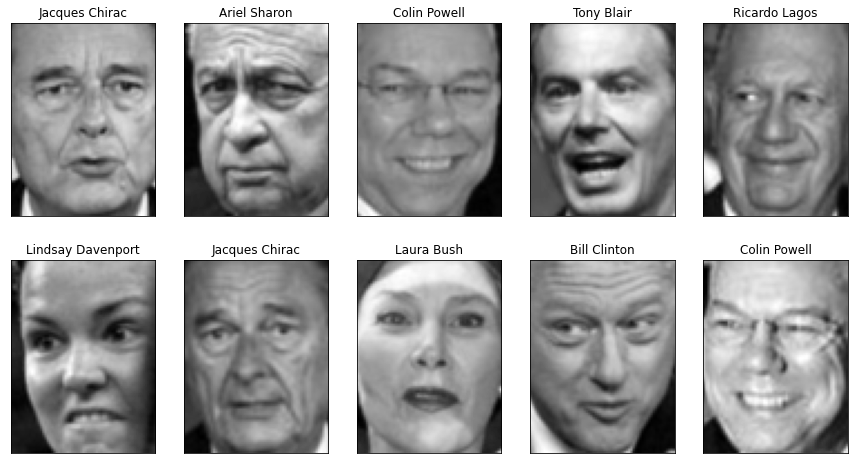

In [2500]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib.cm as cm

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=cm.gray)
    ax.set_title(people.target_names[target])

In [2501]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (2537, 87, 65)
Number of classes: 45


In [2502]:
n_samples, h, w = people.images.shape

In [2503]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Ariel Sharon               77   Atal Bihari Vajpayee       24   
Bill Clinton               29   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Hamid Karzai               22   Hans Blix                  39   Hugo Chavez                71   
Igor Ivanov                20   Jack Straw                 28   Jacques Chirac             52   
Jean Chretien              55   Jennifer Aniston           21   Jennifer Capriati          42   
Jennifer Lopez             21   John Ashcroft              53   Juan Carlos Ferrero        28   
Junichiro Koizumi          60   Kofi Annan                 32   Laura Bush                 41   
Lindsay Davenport          22 

In [2504]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

<ipython-input-2504-0f53c27b3db9>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


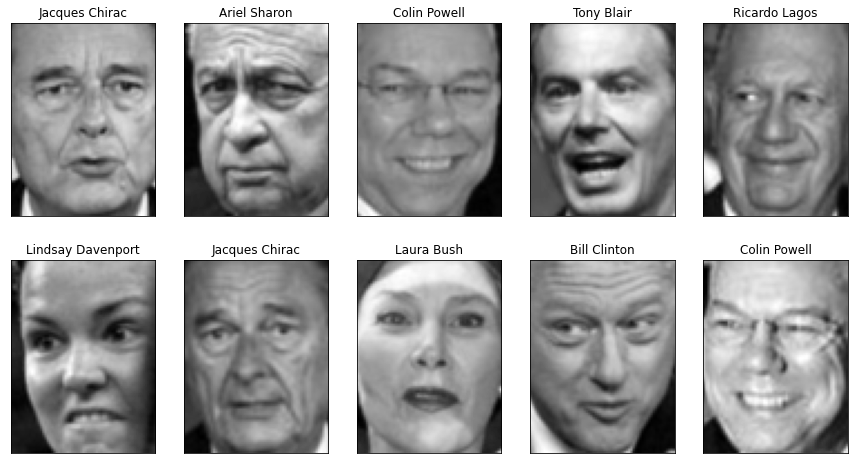

In [2505]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=cm.gray)
    ax.set_title(people.target_names[target])

In [2506]:
df = pd.DataFrame(data=X_people)

In [2507]:
def Standardise(string1):
    m1=np.mean(string1)
    std1=np.std(string1)
    string2=(string1-m1)/std1
    return string2
df1=df.apply(Standardise)

In [2508]:
f=df1.to_numpy()

In [2509]:
e1=df1.T.to_numpy()

In [2510]:
v=np.cov(e1)

In [2511]:
v.shape

(5655, 5655)

In [2512]:
from numpy.linalg import eig

In [2513]:
val,vec=eig(v)

In [2514]:
print(vec.shape)
print(val.shape)

(5655, 5655)
(5655,)


In [2515]:
sorted_index = np.argsort(val)[::-1]
sorted_eigenvalue = val[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = vec[:,sorted_index]

In [2516]:
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
X_reduced = np.dot(eigenvector_subset.transpose(),f.transpose()).transpose()
eigenvector_subset.shape

(5655, 2)

[195] (array([1220]),)
(array([795]),) (array([1331]),)


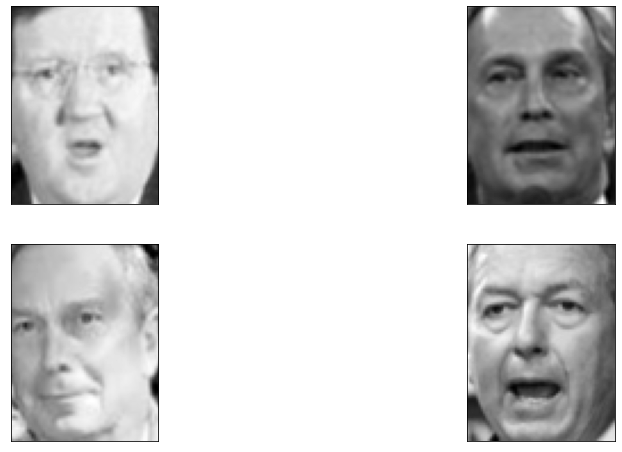

In [2535]:
min1,max1 =np.where(X_reduced[:,0]==np.min(X_reduced[:,0])),np.where(X_reduced[:,0]==np.max(X_reduced[:,0]))
print(min1[0],max1)
min2,max2 = np.where(X_reduced[:,1]==np.min(X_reduced[:,1])),np.where(X_reduced[:,1]==np.max(X_reduced[:,1]))
print(min2,max2)
fig, axes = plt.subplots(2, 2, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for face, ax in zip([195, 1220,  795, 1331], axes.ravel()):
    ax.imshow(people.images[face], cmap=cm.gray)

<ipython-input-2499-0be3715b7a8c>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img1 = img1.astype(np.float)
<ipython-input-2499-0be3715b7a8c>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  img1 = img1.astype(np.float)


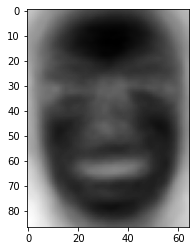

In [2499]:
besteigenvec = eigenvector_subset[:,0]
img1 = besteigenvec.reshape((87,65))
img1 = img1.astype(np.float)
print("primary principal component")
plt.imshow(img1, cmap=cm.gray)

In [2542]:
sorted_index_1 = np.argsort(val)[::-1]
sorted_eigenvalue = val[sorted_index_1]
#similarly sort the eigenvectors 
sorted_eigenvectors_1 = vec[:,sorted_index]
n_components_1 = 100 #you can select any number of components.
eigenvector_subset_1 = sorted_eigenvectors_1[:,0:n_components_1]
X_reduced_1 = np.dot(eigenvector_subset_1.transpose(),f.transpose()).transpose()
eigenvector_subset_1.shape

(5655, 100)

<ipython-input-2545-6c7d0637b341>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(img_1.astype(float), cmap=cm.gray)


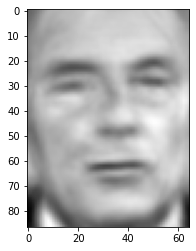

In [2545]:
mean23, std23 =  np.mean(X_people, axis=0).reshape(-1,1), np.std(X_people, axis=0, ddof=1).reshape(-1,1)
img_1 = X_reduced_1[0].reshape((1,-1))
img_1 = img_1 @eigenvector_subset_1.T
img_1= (img_1*std23.T)+mean23.T
img_1 = img_1.reshape((87,65))
plt.imshow(img_1.astype(float), cmap=cm.gray)

0.04999491436550518 186
(87, 65)


<ipython-input-2549-bb02a8b901eb>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(img_f1.astype(float), cmap=cm.gray)


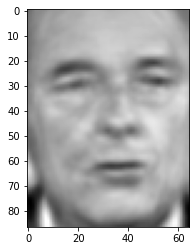

In [2549]:
dim = 2
var1 = np.var(f)
sorted_index_2 = np.argsort(val)[::-1]
vec_new = vec[:,sorted_index_2]
val_new = val[sorted_index_2]
while True:
    vec_temp1 = vec_new[:,0:dim]
    pca1= f@vec_temp1
    reconstruction = pca1@vec_temp1.T
    pca_variance = np.var(reconstruction)
    diff = var1-pca_variance
    if diff <= 0.05:
        print(diff,dim)
        break
    dim +=1
img_f1 = pca1[0].reshape((1,-1))
img_f1 = img_f1@vec_temp1.T
img_f1= (img_f1*std23.T)+mean23.T
img_f1 = img_f1.reshape((87,65))
print(img_f1.shape)
plt.imshow(img_f1.astype(float), cmap=cm.gray)

1577
(87, 65)


<ipython-input-2610-b9447190d7a1>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(img_test.astype(float), cmap=cm.gray)


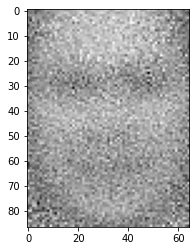

In [2610]:
dim = X_people.shape[0]
print(dim)
# meanX, stdX
img_test = f[0].reshape((1,-1))
img_test = img_test@vec_new.T
img_test= (img_test*std23.T)+mean23.T
img_test = img_test.reshape((87,65))
print(img_test.shape)
plt.imshow(img_test.astype(float), cmap=cm.gray)

---
---
# Part 4: Clustering

Let’s implement our own version of k-means to cluster data! Once you have your setup complete as shown above , write a script to do the following:
1.  Write  your  own  version  of  K-means  clustering  where  you  use  the  L2  distance  to  compute similarity
2.  Standardize your data (zero mean, divide by standard deviation)
3.  Reduces the data to 100D using PCA.
4.  Run K-means clustering with K = 10.
5.  Report the number of images within each cluster.
6.  Reconstruct the cluster centers for each of the K clusters.  You will have to rotate the cluster centers back to the original space to visualize.  Report these images.
7.  Find the image closest to the cluster center, and furthest from the cluster center and report these images.  Again, you will have to rotate the images centers back to the original space to visualize.

__Implementation Details__
1.  Seed your random number generator with zero (do this right before running your k-means).
2.  Randomly select k observations and use them for the initial reference vectors.  I suggest you use randomize the indices and use the first k randomized indices to select the observations.
3.  Use the L2 distance (Euclidean) to measure the distance between observations and reference vectors.
4.  Terminate the training process when the sum of magnitude of change of the cluster centers (from the previous iteration to the current one) is less than $\epsilon=2^{-23}$.  That is, when $\sum_{i=1}^k d(a_i(t-1),a_i(t))<\epsilon$ where $k$ is the number of clusters, $a_i(t)$ is the reference vector for cluster $i$ at time $t$ and $d(x,y)$ is the L1 distance (Manhattan) between vectors $x$ and $y$ (as defined in the _Similarity and Distance Functions_ link on BBlearn), or when you've hit 10,000 iterations.

In [2567]:
df = pd.DataFrame(data=X_people)
def Standardise(string1):
    m1=np.mean(string1)
    std1=np.std(string1)
    string2=(string1-m1)/std1
    return string2
df1=df.apply(Standardise)


In [2568]:
X=df1.to_numpy()
e1=df1.T.to_numpy()
e1.shape

(5655, 1577)

In [2569]:
v=np.cov(e1)
from numpy.linalg import eig
val,vec=eig(v)

In [2618]:
sorted_index = np.argsort(val)[::-1]
sorted_eigenvalue = val[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = vec[:,sorted_index]
n_components = 100 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
eigenvector_subset.shape

(5655, 100)

In [2619]:
X_reduced = np.dot(eigenvector_subset.transpose(),f.transpose()).transpose()

In [2620]:
X_reduced

array([[-35.54691031+0.j,  12.54720679+0.j,   2.80998438+0.j, ...,
         -3.42559574+0.j,   0.16237098+0.j,   3.98125904+0.j],
       [ 43.90277194+0.j,  16.55479901+0.j, -12.9888209 +0.j, ...,
          5.07036923+0.j,  -5.35488238+0.j,   3.80243584+0.j],
       [  1.48052537+0.j, -17.624548  +0.j,  10.92830937+0.j, ...,
         -3.94936438+0.j,  -0.08731724+0.j,   1.51189737+0.j],
       ...,
       [-14.42154729+0.j,  58.98607396+0.j, -14.48877391+0.j, ...,
          4.60790643+0.j,  -2.91598645+0.j,   0.34613491+0.j],
       [-13.33391683+0.j,  18.84651195+0.j, -35.19563328+0.j, ...,
         -1.75510202+0.j,   0.14249695+0.j,  -0.81141118+0.j],
       [-41.50046173+0.j,  -9.87437792+0.j,  17.6243162 +0.j, ...,
          3.00273369+0.j,   6.28004404+0.j,   4.39189006+0.j]])

In [2621]:
import numpy as np
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt
#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] 
    print(centroids.shape)
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean')
    #print(distances)
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
        dist12 = np.array([[min(i),X_reduced[ind]] for ind,i in enumerate(distances)]) 
    return points,dist12
 
#Applying our function
label,centroids = kmeans(X_reduced,10,1000)
 
#Visualize the results
print(label,centroids) 



(10, 100)


<ipython-input-2621-aa2f8aa008cb>:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dist12 = np.array([[min(i),X_reduced[ind]] for ind,i in enumerate(distances)])


[0 6 7 ... 2 2 1] [[46.30099222255128
  array([-3.55469103e+01+0.j,  1.25472068e+01+0.j,  2.80998438e+00+0.j,
         -1.53464245e+01+0.j, -1.24071757e+01+0.j,  6.68108437e+00+0.j,
         -7.83244712e+00+0.j,  6.18730112e+00+0.j, -4.61945078e-01+0.j,
          3.05547061e+00+0.j, -2.87018211e+00+0.j,  3.73524553e+00+0.j,
         -1.30537604e+01+0.j, -3.24895551e+00+0.j,  2.21204330e+00+0.j,
         -2.27770055e+00+0.j, -4.20670264e+00+0.j, -3.14018679e-01+0.j,
          5.38036419e+00+0.j, -3.40525627e-01+0.j, -9.22527530e-01+0.j,
          8.63544602e-01+0.j,  1.44762725e+00+0.j,  4.71710105e+00+0.j,
         -1.96239977e-02+0.j, -2.53556975e+00+0.j, -4.38744896e+00+0.j,
         -3.25873281e+00+0.j, -1.85813820e-01+0.j,  4.89354483e+00+0.j,
          4.81321708e+00+0.j, -9.10427688e-02+0.j,  3.00171234e+00+0.j,
          1.95040950e+00+0.j,  5.86165329e+00+0.j,  3.21539757e+00+0.j,
          1.12013314e+00+0.j,  6.33456849e-01+0.j,  5.39933669e-01+0.j,
         -9.16076938e-01+0

In [2625]:
clusters, i = np.unique(label, return_counts=True)

print(np.array(( i)))

[145 215 148 143 113 223 150 237  83 120]


<ipython-input-2624-318eda1764bb>:29: ComplexWarning: Casting complex values to real discards the imaginary part
  ax.imshow(image.astype(float), cmap=cm.gray)


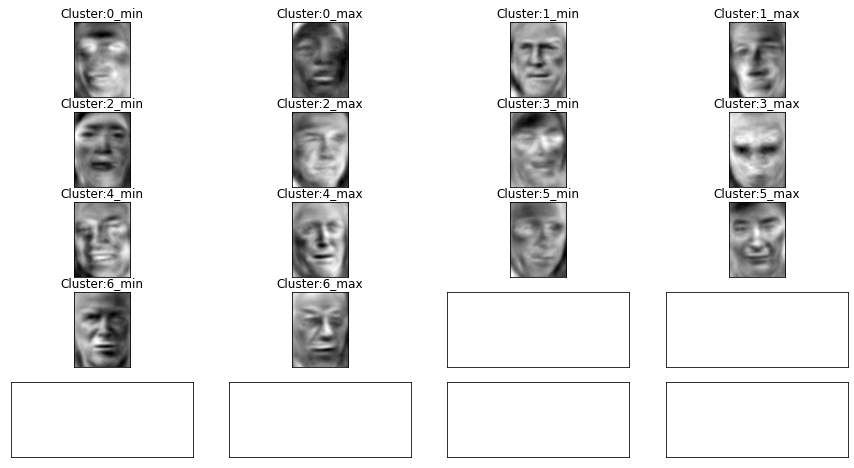

In [2624]:
images = []
# print(dists_clst.shape)
fig, axes = plt.subplots(5,4, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
# print(dists_clst)

faces = []
c_list = []
for c in range(k):
    temporary = centroids[:,0][label==c]
    face1 = centroids[:,1][np.argmin(temporary)]
    face2 = centroids[:,1][np.argmax(temporary)]
    img_face = face1.reshape((1,-1))
    img_face = img_face@eigenvector_subset.T

    img_face = img_min.reshape((87,65))
    faces.append(img_min)
    c_list.append(f"{c}_min")    
    
    img_m = maxface.reshape((1,-1))
    img_m = img_m@eigenvector_subset.T

    img_m = img_m.reshape((87,65))
    faces.append(img_m)
    c_list.append(f"{c}_max")
    

for target, image, ax in zip(c_list, faces, axes.ravel()):
    ax.imshow(image.astype(float), cmap=cm.gray)
    ax.set_title(f'Cluster:{target}')